# 1. Бейглз

В дедуктивной логической игре «Бейглз» необходимо по
подсказкам угадать секретное число из трех цифр. В ответ на ваши попытки угадать игра выдает одну из трех подсказок: **Pico**, если вы угадали правильную цифру на
неправильном месте, **Fermi**, если в вашей догадке есть правильная цифра на правильном месте, и **Bagels**, если в догадке
не содержится правильных цифр. На угадывание секретного
числа у вас десять попыток

In [ ]:
import random

# Всего будет цифр
num_digits = 3

# Макс кол-во угадываний
max_guesses = 10

# главная функция
def main():
  print(f"""Bagels, a deductive logic game.
Описание работы:

Я думаю о числе из {num_digits} цифр, которые не повторяются.
Попробуй угадать это число. Вот правила:
Что я скажу: Что это значит:
'Попал' Угадал одну цифру, но её позиция неправильная.
'Точно' Угадал одну цифру на своей позиции.
'Мимо' Не угадал ни одной цифры.

Для примера, если я придумал число 248 а ты загадал 843, то ты увидишь:
Точно Попал.""")

  while True:
    # Генерируем секретное число
    secretnum = getsecretnum()
    print(f'Я придумал число. У тебя есть {max_guesses} попыток чтобы угадать его.')

    # Сейчас 1 попытка
    num_guesses = 1
    # Пока количество попыток не превысило максимум идем по циклу
    while num_guesses <= max_guesses:
      guess = ''
      # Просим угадать число, и проверяем на правильность введенных данных
      while len(guess) != num_digits or not guess.isdecimal():
        print(f'Попытка #{num_guesses}')
        guess = input('> ')

      # Угадал / не угадал и сколько
      clues = getClues(guess, secretnum)
      print(clues)
      num_guesses += 1

      # Обрываем весь цикл если угадал число
      if guess == secretnum: break
      # Если кончились попытки - конец
      if num_guesses > max_guesses:
        print('Попытки кончились.')
        print(f'А я загадл число {secretnum}')

    # После конца игры - предлагаем сыграть еще
    print('Хочешь сыграем еще раз? (Y или N)')
    if not input('> ').lower().startswith('y'):
      break
    print('Спасибо за игру!')


# Генератор секретного число
def getsecretnum():
  """Возвращает строку из num_digits уникальных случайных цифр."""
  numbers = list('0123456789') # Создает список цифр от 0 до 9.
  random.shuffle(numbers) # Перетасовываем их случайным образом.

  # Берем первые NUM_DIGITS цифр списка для нашего секретного числа:
  secretnum = ''
  for i in range(num_digits):
    secretnum += str(numbers[i])
  return secretnum


# Проверка на "угадывание" + подсказка
def getClues(guess, secretnum):
  """Возвращает строку с подсказками pico, fermi и bagels
  для полученной на входе пары из догадки и секретного числа."""

  if guess == secretnum:
    return 'Все верно, ты угадал задуманное число'

  # Список для хранения подсказок
  clues = []

  for i in range(len(guess)):
    if guess[i] == secretnum[i]:
      clues.append('Точно')
    elif guess[i] in secretnum:
      clues.append('Попал')
  if len(clues) == 0:
    return 'Мимо'
  else:
    # Сортируем подсказки в алфавитном порядке, чтобы их исходный
    # порядок ничего не выдавал.
    clues.sort()

    # Склеиваем список подсказок в одно строковое значение.
    return ' '.join(clues)


main()

Bagels, a deductive logic game.
Описание работы:

Я думаю о числе из 3 цифр, которые не повторяются.
Попробуй угадать это число. Вот правила:
Что я скажу: Что это значит:
'Попал' Угадал одну цифру, но её позиция неправильная.
'Точно' Угадал одну цифру на своей позиции.
'Мимо' Не угадал ни одной цифры.

Для примера, если я придумал число 248 а ты загадал 843, то ты увидишь:
Точно Попал.
Я придумал число. У тебя есть 10 попыток чтобы угадать его.
Попытка #1
> 123
Мимо
Попытка #2
> 456
Попал
Попытка #3
> 478
Точно
Попытка #4
> 698
Попал
Попытка #5
> 579
Попал Попал Точно
Попытка #6
> 9755
Попытка #6
> 975
Все верно, ты угадал задуманное число
Хочешь сыграем еще раз? (Y или N)
> твыа


# 2 Парадокс дней рождения

Парадокс дней рождения, также известный как задача
о днях рождения, заключается в удивительно высокой
вероятности того, что у двух человек совпадает день рождения даже в относительно небольшой группе людей.

В группе из 70 человек вероятность совпадения дней рождения у двух людей составляет 99,9 %. Но даже в группе всего
лишь из 23 человек вероятность совпадения дней рождения
составляет 50 %.

Приведенная программа производит несколько вероятностных
экспериментов, чтобы определить процентные соотношения для групп различного
размера.

Подобные эксперименты с определением возможных исходов с помощью
множества случайных испытаний называются экспериментами Монте-Карло.

Узнать больше о парадоксе дней рождения можно в соответствующей статье «Википедии»: https://ru.wikipedia.org/wiki/Парадокс_дней_рождения.

In [ ]:
import datetime, random

def getBirthdays(numberOfBurthdays):
  """Возвращаем список объектов дат для случайных дней рождения."""
  # храним все дни рождения
  birthdays = []
  for i in range(numberOfBurthdays):
    # Дата начала отсчета
    startOfYear = datetime.date(2001, 1, 1)
    # Получаем случайное число в формате datetime
    randomNumberOfDays = datetime.timedelta(random.randint(0,364))
    # Складываем с датой отсчета, получая случайную дату рождения
    birthday = startOfYear + randomNumberOfDays
    birthdays.append(birthday)
  return birthdays


def getMatch(birthdays):
  """ Возвращаем объект даты дня рождения, встречающегося
  несколько раз в списке дней рождения."""
  if len(birthdays) == len(set(birthdays)):
    return None # Все дни рождения различны, возвращаем None.

  # Сравниваем ДР друг с другом попарно
  for a, birthdayA in enumerate(birthdays):
    for b, birthdayB in enumerate(birthdays[a+1:]):
      if birthdayA == birthdayB:
        return birthdayA # Возвращаем найденное соответствие


# Отображаем вводную информацию:
print('''
Парадокс дней рождения показывает нам, что в группе из N человек вероятность того,
что у двоих из них совпадают дни рождения, удивительно высока.

Эта программа выполняет симуляцию Монте-Карло (то есть повторные случайные симуляции).''')
print()

# Создаем кортеж названий месяцев по порядку:
MONTHS = tuple(datetime.date(2000, month, 1).strftime('%b') for month in range(1, 13))

while True: # Запрашиваем, пока пользователь не введет допустимое значение.
  print('Группу из скольки человек проверим? (больше 100 не смогу)')
  response = input('> ')
  if response.isdecimal() and (0 < int(response) <= 100):
    numBDays = int(response)
    break # Пользователь ввел допустимое значение

print()

# Генерируем и отображаем дни рождения:
print('Берем группу из:', numBDays, 'человек, пусть все их дни рождения в разные даты:')
# Создаем нужное кол-во случайных дней рождения
birthdays = getBirthdays(numBDays)
# Выведем им для ознакомления пользователя
for i, birthday in enumerate(birthdays):
  if i != 0:
    print(', ', end='')
  monthName = MONTHS[birthday.month - 1]
  dateText = f'{monthName} {birthday.day}'
  if i%10 == 0: print()
  print(dateText, end='')

print()
print()

# Выясняем, встречаются ли два совпадающих дня рождения.
match_ = getMatch(birthdays)

# Отображаем результаты:
print('В самой первой симуляции, ', end='')
if match_ != None:
  monthName = MONTHS[match_.month - 1]
  dateText = f'{monthName} {match_.day}'
  print('Самые первые дни рождения совпали в дату', dateText)
else:
  print('Совпадений дней рождений не было.')
print()

# Производим 100_000 операций имитационного моделирования
print('Теперь мы сгенерируем', numBDays, 'случайных дней рождения 100,000 раз...')
print('Посмотрим сколько раз за симуляцию найдутся люди с одинаковой датой рождения.')
input('Нажмите Enter и я начну...')

print('Провожу очередные 100_000 симуляций.')
simMatch = 0 # Число операций моделирования с совпадающими днями рождения.
for i in range(100_000):
  # Отображаем сообщение о ходе выполнения каждые 10 000 операций:
  if i % 10_000 == 0:
    print(i, 'simulation run...')
  birthdays = getBirthdays(numBDays)
  if getMatch(birthdays) != None:
    simMatch += 1
print('100_000 simulations run')

# Отображаем результаты имитационного моделирования:
probability = round(simMatch / 100_000 * 100, 2)
print('За 100_000 симуляций',numBDays,'дней рождений, нашлось')
print(simMatch, 'людей с одинаковой датой рождения.')
print('Это означает, что для группы из',numBDays, 'человек. шанс совпадения дня рождения =',probability,'%')


Парадокс дней рождения показывает нам, что в группе из N человек вероятность того, 
что у двоих из них совпадают дни рождения, удивительно высока.

Эта программа выполняет симуляцию Монте-Карло (то есть повторные случайные симуляции).

Группу из скольки человек проверим? (больше 100 не смогу)
> 166

Берем группу из: 166 человек, пусть все их дни рождения в разные даты:

Mar 8, Nov 9, Jul 29, Sep 2, Aug 16, Mar 27, Oct 10, Mar 8, Jul 18, May 5, 
May 13, Jun 24, Nov 23, Apr 22, Jul 26, Nov 26, Nov 24, Feb 13, Jan 27, Mar 31, 
Oct 27, Aug 11, Apr 24, Nov 28, Mar 11, Aug 20, Dec 1, Nov 22, Jun 10, Jul 2, 
Jan 18, Sep 10, Aug 28, Jun 6, Aug 8, Sep 19, Aug 15, Dec 30, Mar 15, Jun 29, 
May 17, May 25, Dec 3, Dec 27, May 25, Feb 1, Oct 2, Jan 27, May 7, Feb 4, 
Jan 18, Aug 10, Sep 5, Dec 5, Apr 27, Sep 20, Oct 6, Nov 23, Aug 18, May 11, 
Jan 25, Jun 19, Aug 21, Mar 7, Sep 11, Sep 16, Mar 7, Jan 3, Aug 25, May 26, 
May 23, May 13, Jun 12, Aug 11, Aug 9, Mar 7, Feb 5, Sep 27, Jul 27, Jul 23, 
N

# 3 Моделирование лесных пожаров

В данной программе мы моделируем лес, деревья в кото-
ром непрерывно растут, а затем сгорают. На каждом этапе

моделирования существует равная 1 % вероятность того,

что на пустом месте вырастет дерево, а также 1 % вероятно-
сти того, что в дерево попадет молния и оно сгорит. Пожары

распространяются на непосредственно прилегающие к нему
деревья, поэтому более густой лес скорее пострадает от сильного
пожара, чем разреженный.

**Описание работы**


Эта программа — пример эмерджентного поведения, при котором взаимодействие
между простыми составляющими системы приводит к сложным закономерностям.

На пустых местах вырастают деревья, молнии их поджигают, а огонь превращает
деревья обратно в пустое пространство, распространяясь при этом на соседние
деревья. Подбирая различную скорость роста деревьев и частоту ударов молний,
вы можете добиться различных явлений.

Например, низкая вероятность удара молнии и высокая скорость роста приводят к обширным постоянным лесным по-
жарам, поскольку деревья располагаются кучно и быстро вырастают снова. Низкая же скорость роста деревьев при высокой вероятности ударов молний приводит
к возникновению нескольких маленьких пожаров, быстро потухающих из-за
отсутствия деревьев поблизости.

In [ ]:
!pip install Bext

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for Bext: filename=Bext-0.1.0-py3-none-any.whl size=9858 sha256=82c03c6c78c46d331078e94e403b35718c480e0112b12bedb03d13cc54afc793
  Stored in directory: /root/.cache/pip/wheels/05/c3/56/632e788fcbaee4beb4f0877f65ecb0a2216a2c675cc40d7cb5
Successfully built Bext


In [ ]:
import random, sys, time
import matplotlib.pyplot as plt


try:
 import bext
except ImportError:
 print('This program requires the bext module, which you')
 print('can install by following the instructions at')
 print('https://pypi.org/project/Bext/')

In [ ]:
WIDTH = 70
HEIGHT = 70

def create_new_forest():
  """
  Возвращает массив в качестве новой структуры данных для леса
  """

  forest = {'width': WIDTH, 'height': HEIGHT}
  for x in range(WIDTH):
    for y in range(HEIGHT):
      if random.random() * 100 <= INITIAL_TREE_DENSITY:
        forest[(x,y)] = TREE
      else:
        forest[(x,y)] = EMPTY
  return forest

Рисует озеро, в заданном кол-ве.

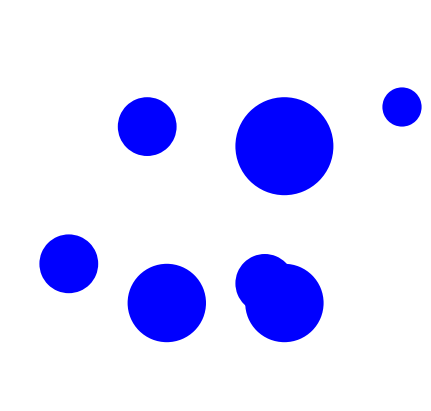

In [173]:
def draw_lake(count_ = 4, radius_=25, color_='blue'):
  random_lake_radius = [10,15,20,25]
  random_lake_center = [-20,-30,-40, -50,-70,30,50,100,70,40]
  for i in range(count_):
    rad = random.choices(random_lake_radius)[0]
    place = random.choices(random_lake_center)[0], random.choices(random_lake_center)[0]
    plt.pie([1], radius=rad, center=place, colors='blue')
  plt.grid(True)
  plt.axis(True)


plt.figure(figsize=(6, 4))
draw_lake(7)
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.show()

Рисует город на основе площади города - `S`

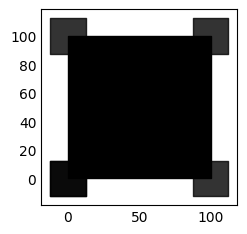

In [189]:
def draw_city(S_=100, color='black'):
  # Сторона основного квадрата (на основе площади)
  S = S_**1/2
  # Сторона вспомогательных квадратов (на основе площади основного)
  C = (S//2)**1/2
  color = 'black'

  for i in range(6):
    if i == 0:
      box = (0, 0, S*2, S*2, 0), (0, S*2, S*2, 0, 0)
      X = np.linspace(min(box[0]), max(box[0]))
      Y1 = min(box[1])
      Y2 = max(box[1])
      plt.fill_between(X, Y1, Y2, color=color)
    else:
      s_0 = box[0][i-1]
      s_1 = box[1][i-1]
      mini_box = [(s_0-C, s_0-C, (s_0+C), (s_0+C), s_0-C),
                  (s_1-C, (s_1+C), (s_1+C), s_1-C, s_1-C)]
      X = np.linspace(min(mini_box[0]), max(mini_box[0]))
      Y1 = min(mini_box[1])
      Y2 = max(mini_box[1])
      plt.fill_between(X, Y1, Y2, color=color, alpha=0.8)


draw_city()
plt.show()

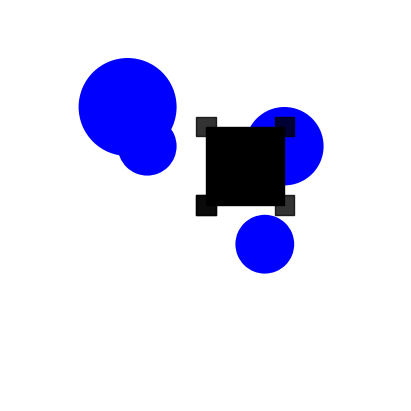

In [196]:
plt.figure(figsize=(6, 4))
draw_lake()
draw_city(40)
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()

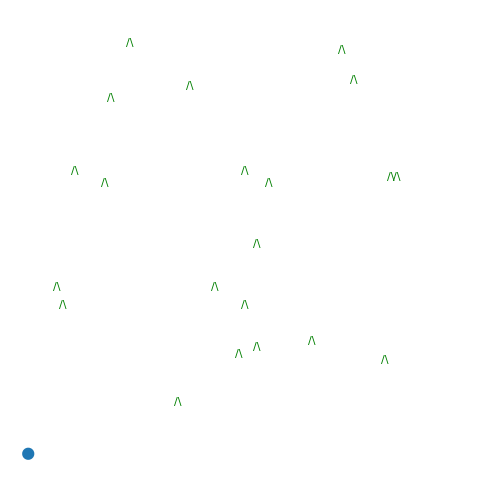

In [43]:
forest = create_new_forest()
forest

WIDTH = 70
HEIGHT = 70

plt.figure(figsize=(8, 6))

plt.pie([35])
plt.grid(True)
plt.axis(True)

# Отрисовываем элементы на их координатах
for k, v in forest.items():
    if k in ['width', 'height'] or v == ' ':
      continue
    elif v == '/\\':
      plt.text(k[0], k[1], v, fontsize=8, color='green')
    elif v == 'W':
      plt.text(k[0], k[1], v, fontsize=8, color='red')

plt.xlim(-3,73)
plt.ylim(-3,73)
plt.grid(False)
plt.axis(False)
plt.show()

In [ ]:
# Задаем константы
WIDTH = 70
HEIGHT = 70

TREE = '/\\'
FIRE = 'W'
EMPTY = ' '
plt.rcParams['font.family'] = 'DejaVu Sans'

# попробовать взять дургие значения
INITIAL_TREE_DENSITY = 0.5 # Начальное заполнение всего леса деревьями
GROW_CHANCE = 0.05
FIRE_CHANCE = 0.05

# Длительность паузы действий
PAUSE_LENGTH = 1.5


def main():
  forest = create_new_forest()
  bext.clear()

  while True: # Основной цикл программы
    reply = display_forest(forest)
    if reply == False: break
    # Отдельный шаг моделирования
    next_forest = {'width': forest['width'],
                   'height': forest['height']}

    for x in range(forest['width']):
      for y in range(forest['height']):
        if (x, y) in next_forest:
          # Если значение nextForest[(x, y)] уже было задано
          # на предыдущей итерации, ничего не делаем:
          continue

        if ((forest[(x,y)] == EMPTY) and (random.random() <= GROW_CHANCE)):
          # выращиваем дерево на данном участке
          next_forest[(x,y)] = TREE
        elif ((forest[(x,y)] == TREE) and (random.random() <= FIRE_CHANCE)):
          # молния поджигает дерево
          next_forest[(x,y)] = FIRE
        elif forest[(x,y)] == FIRE:
          # дерево горит
          # берем всех его соседей
          for ix in range(-1, 2):
            for iy in range(-1, 2):
              # Огонь переходит на соседние деревья
              if forest.get((x + ix, y + iy)) == TREE:
                next_forest[(x + ix, y + iy)] = FIRE
          # Исходное дерево сгорело - убираем его
          next_forest[(x,y)] = EMPTY
        else:
          # просто копиреуем существующий обьект
          next_forest[(x,y)] = forest[(x,y)]
    forest = next_forest
    time.sleep(PAUSE_LENGTH)


def create_new_forest():
  """
  Возвращает массив в качестве новой структуры данных для леса
  """

  forest = {'width': WIDTH, 'height': HEIGHT}
  for x in range(WIDTH):
    for y in range(HEIGHT):
      if random.random() * 100 <= INITIAL_TREE_DENSITY:
        forest[(x,y)] = TREE
      else:
        forest[(x,y)] = EMPTY
  return forest


def display_forest(forest):
  """
  Отображает лес на экране
  """

  bext.goto(0,0)
  for y in range(forest['height']):
    for x in range(forest['width']):
      if forest[(x,y)] == TREE:
        bext.fg('green')
        print(TREE, end='')
      elif forest[(x,y)] == FIRE:
        bext.fg('red')
        print(FIRE, end='')
      elif forest[(x,y)] == EMPTY:
        print(EMPTY, end='')
    print()
  bext.fg('reset') # Используем цвет шрифта по умолчанию.
  print('Grow chance: {}% '.format(GROW_CHANCE * 100), end='')
  print('Lightning chance: {}% '.format(FIRE_CHANCE * 100))
  inp = input('Продолжить симуляцию (да) или прервать (нет)?:\n>')
  if inp.lower() not in ['да', 'yes','д','y','+','ok','go']: return False

In [26]:
def go():
  forest = create_new_forest()

  plt.figure(figsize=(8, 6))

  # Отрисовываем элементы на их координатах
  for k, v in forest.items():
      if k in ['width', 'height'] or v == ' ':
        continue
      elif v == '/\\':
        plt.text(k[0], k[1], v, fontsize=8, color='green')
      elif v == 'W':
        plt.text(k[0], k[1], v, fontsize=8, color='red')

  plt.xlim(-3,73)
  plt.ylim(-3,75)
  plt.grid(False)
  plt.axis(False)
  plt.show()

  s = 0
  num_sim = int(input('Запускаем симуляцю, сколько эпох вы хотите?\n> '))

  while True:
    plt.figure(figsize=(8, 6))
    # Отдельный шаг моделирования
    next_forest = {'width': forest['width'],
                    'height': forest['height']}

    for x in range(forest['width']):
      for y in range(forest['height']):
        if (x, y) in next_forest:
          # Если значение nextForest[(x, y)] уже было задано
          # на предыдущей итерации, ничего не делаем:
          continue

        if ((forest[(x,y)] == EMPTY) and (random.random() <= GROW_CHANCE)):
          # выращиваем дерево на данном участке
          next_forest[(x,y)] = TREE
        elif ((forest[(x,y)] == TREE) and (random.random() <= FIRE_CHANCE)):
          # молния поджигает дерево
          next_forest[(x,y)] = FIRE
        elif forest[(x,y)] == FIRE:
          # дерево горит
          # берем всех его соседей
          for ix in range(-1, 2):
            for iy in range(-1, 2):
              # Огонь переходит на соседние деревья
              if forest.get((x + ix, y + iy)) == TREE:
                next_forest[(x + ix, y + iy)] = FIRE
          # Исходное дерево сгорело - убираем его
          next_forest[(x,y)] = EMPTY
        else:
          # просто копиреуем существующий обьект
          next_forest[(x,y)] = forest[(x,y)]
    forest = next_forest
    time.sleep(PAUSE_LENGTH)
    for k, v in forest.items():
      if k in ['width', 'height'] or v == ' ':
        continue
      elif v == '/\\':
        plt.text(k[0], k[1], v, fontsize=8, color='green')
      elif v == 'W':
        plt.text(k[0], k[1], v, fontsize=8, color='red')
    plt.title(f'{s+1} Симуляция')
    plt.xlim(-3, 73)
    plt.ylim(-3, 73)
    plt.grid(False)
    plt.axis(False)
    plt.show()
    s+= 1
    if s == num_sim:
      num_sim = input(f'Прошло {s} симуляций. Сколько запускаем еще?\n> ')
      s = 0
      if num_sim.isdigit():
        if int(num_sim) > 0: continue
        else: break
      else: break
    # reply = input('Продолжить симуляцю?\n>')
    # if reply not in ['да', 'yes', '+', 'ok']: check = False

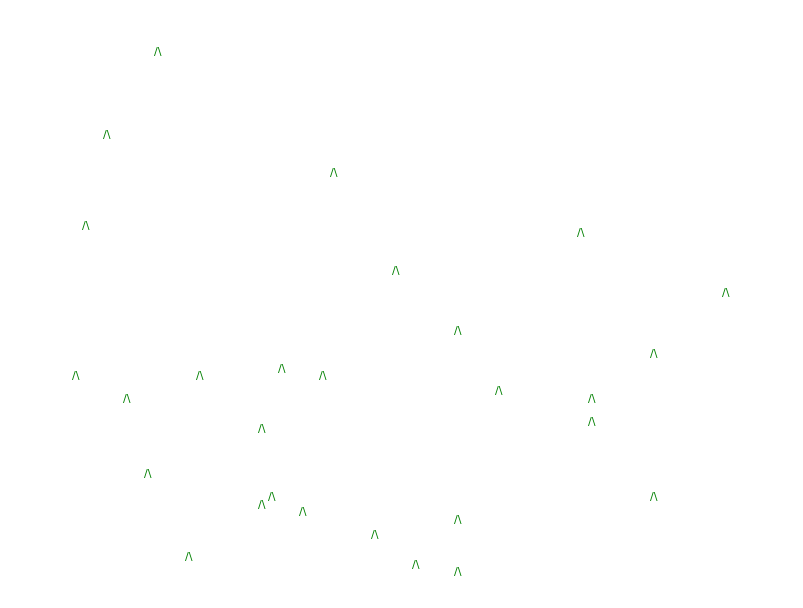

Запускаем симуляцю, сколько эпох вы хотите?
> 4


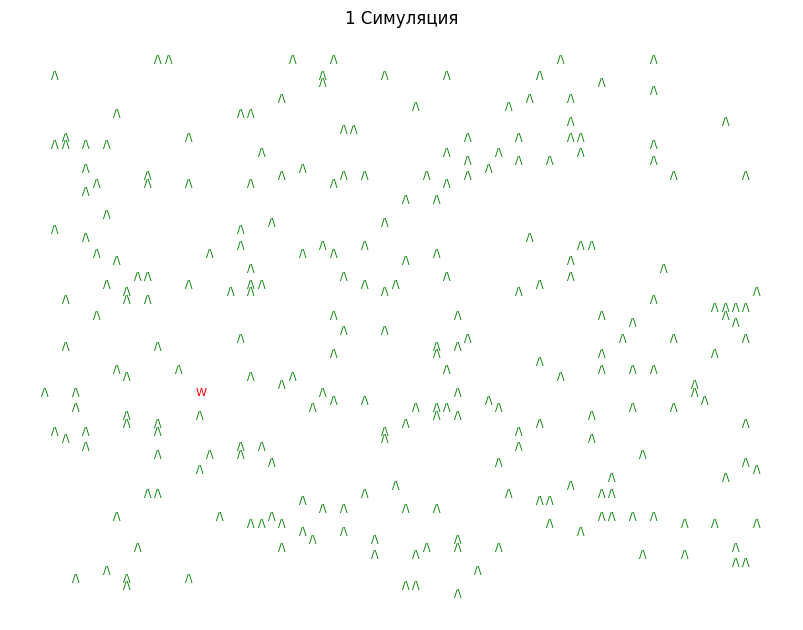

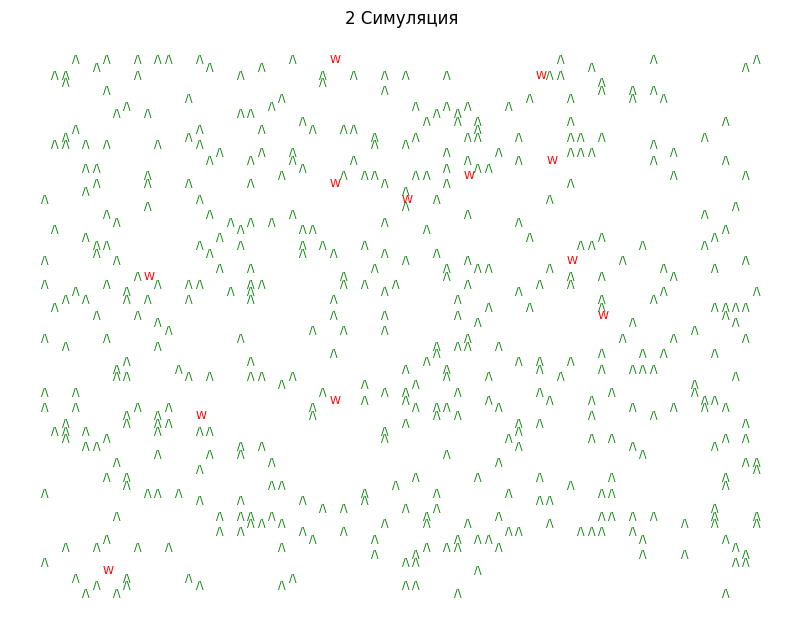

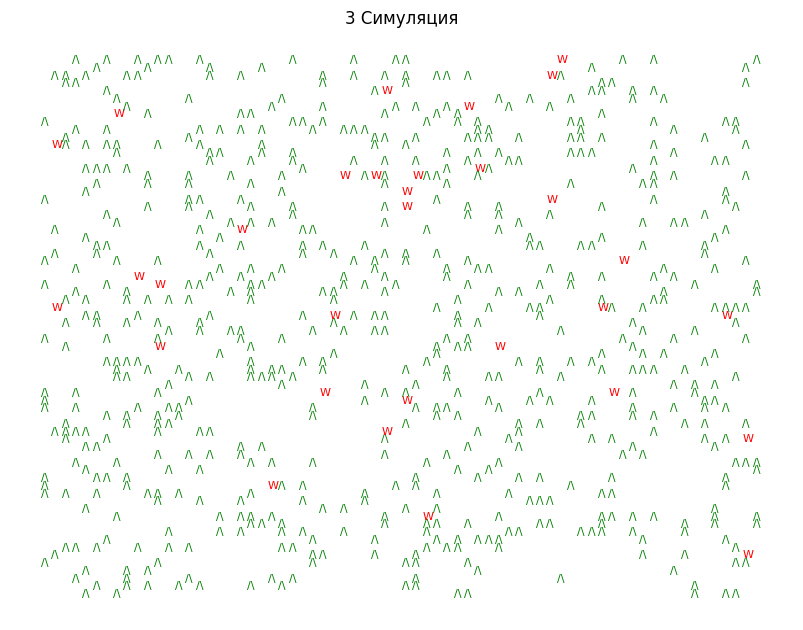

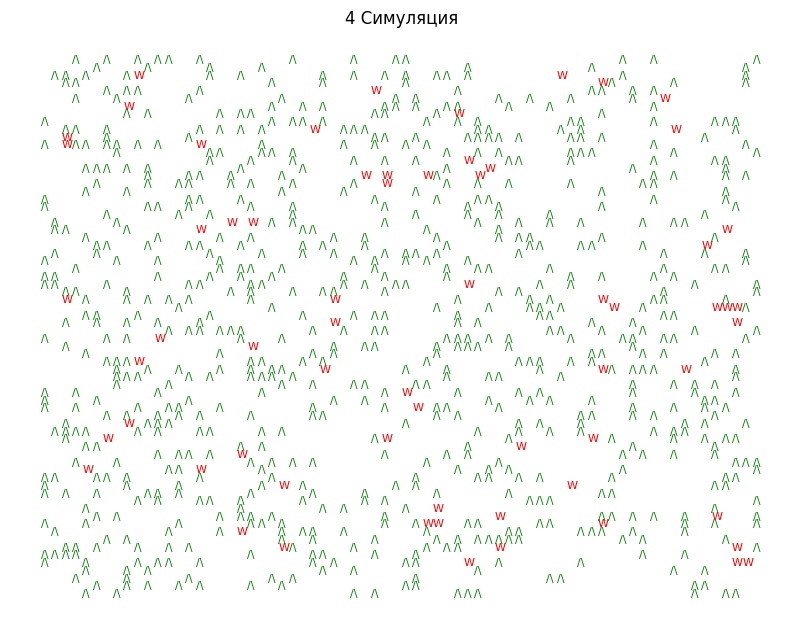

Прошло 4 симуляций. Сколько запускаем еще?
> fuy


In [197]:
go()

- Добавить реки (если дерево горит рядом с рекой, то оно тухнет)
- Добавить город (рядом с городом не важно какое дерево горит - его быстро тушат)
- поменять графику (для начала делать смайликами) или полноценными зонами